In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Let us look for reasons for splitting into train and split

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

* The aim is to predict the median values of houses in an area of California. The features collected are based on general real-estate and geographical information. The task to be solved is therefore regression since the data is continuous variable.

In [3]:
print(housing.DESCR) # Full description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


To simplify future visualization, let's transform the prices from the
100 (k\\$) range to the thousand dollars (k\\$) range.

In [5]:
y *= 100
y.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

# Training Error vs Tesing Error

In [6]:
# We will use a decision tree regressor to solve this task
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

* We would also like to know its potential generalization performance once deployed in production, we use the mean_absolute_error, which gives us the error in native unit ie k$

In [7]:
from sklearn.metrics import mean_absolute_error
y_pred = regressor.predict(X)
score = mean_absolute_error(y, y_pred)
print(f"On average. our regressor makes an error of {score:.2f} k$")

On average. our regressor makes an error of 0.00 k$


Indeed, we trained and predicted on the same dataset. Since our decision tree
was fully grown, every sample in the dataset is stored in a leaf node.
Therefore, our decision tree fully memorized the dataset given during `fit`
and therefore made no error when predicting.

This error computed above is called the **empirical error** or **training
error**.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Let's train our model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [9]:
y_pred = regressor.predict(X_train)
score = mean_absolute_error(y_train, y_pred)
print(f"The training error of our model is {score:.2f} k$")

The training error of our model is 0.00 k$


We observe the same phenomena as in the previous experiment: our model
memorized the training set. However, we now compute the testing error.

In [10]:
y_pred = regressor.predict(X_test)
score = mean_absolute_error(y_test, y_pred)
print(f"The testing error of our model is {score:.2f} k$")

The testing error of our model is 47.28 k$


This testing error is actually about what we would expect from our model if
it was used in a production environment.

# "Shuffle-Split" Cross-validation
At each iteration of this strategy we:

* randomly shuffle the order of the samples of a copy of the full dataset;
* split the shuffled dataset into a train and a test set;
* train a new model on the train set;
* evaluate the testing error on the test set.

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 40, test_size = 0.3, random_state = 0)
cv_results = cross_validate(regressor, X, y, cv = cv, scoring = "neg_mean_absolute_error")

In [12]:
# cv_results is stored in a python dictionary
# We will convert into a pandas df

cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.132153,0.003374,-46.909797
1,0.129448,0.003335,-46.421170
2,0.205384,0.005933,-47.411089
3,0.210837,0.004501,-44.319824
4,0.171221,0.003441,-47.607875
5,0.129817,0.003129,-45.901300
6,0.130106,0.003132,-46.572767
7,0.129240,0.003260,-46.194585
8,0.132871,0.003315,-45.590236
9,0.130546,0.003439,-45.727998


pass a string of the error metric with an additional neg_ string at the front to the parameter scoring; for instance scoring="neg_mean_absolute_error". In this case, the negative of the mean absolute error will be computed which would be equivalent to a score

In [13]:
# Let us negate the error to get the actual score
cv_results["test_error"] = -cv_results["test_score"]

In [14]:
cv_results.head()

,fit_time,score_time,test_score,test_error
0,0.132153,0.003374,-46.909797,46.909797
1,0.129448,0.003335,-46.421170,46.421170
2,0.205384,0.005933,-47.411089,47.411089
3,0.210837,0.004501,-44.319824,44.319824
4,0.171221,0.003441,-47.607875,47.607875


In [15]:
len(cv_results)

40

We get 40 entries because we performed 40 splits

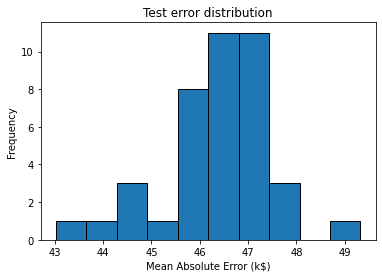

In [16]:
import matplotlib.pyplot as plt

cv_results["test_error"].plot.hist(bins= 10, edgecolor = "black")
plt.xlabel("Mean Absolute Error (k$)")
_ = plt.title("Test error distribution")

* We observe that the clustering is around 47 k\\$ and ranges from 43 k\\$ to 50 k\\$

In [17]:
print(f"The mean cross-validated testing error is: "
      f"{cv_results['test_error'].mean():.2f} k$")

The mean cross-validated testing error is: 46.36 k$


In [18]:
print(f"The standard deviation of the testing error is: "
     f"{cv_results['test_error'].std():.2f} k$")

The standard deviation of the testing error is: 1.17 k$


* We conclude that our cross-validate estimate of the testing error is 46.36 +/- 1.17 k$

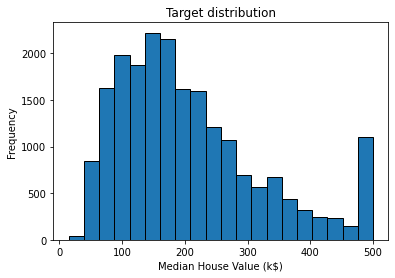

In [19]:
y.plot.hist(bins = 20, edgecolor = "black")
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

In [20]:
print(f"The standard deviation of the target is {y.std():.2f} k$")

The standard deviation of the target is 115.40 k$


* We recall that our model makes, on average, an error around 47 k$. We notice that the mean estimate of the testing error obtained by cross-validation is a bit smaller than the natural scale of variation of the target variable. Furthermore, the standard deviation of the cross validation estimate of the testing error is even smaller.
* This is a good start, but not necessarily enough to decide whether the generalization performance is good enough to make our prediction useful in practice.

In [21]:
cv_results = cross_validate(regressor, X, y, return_estimator = True)
cv_results

{'fit_time': array([0.15535069, 0.15062594, 0.14984918, 0.14997506, 0.14549279]),
 'score_time': array([0.00363755, 0.00253105, 0.00273514, 0.00239825, 0.00248408]),
 'estimator': [DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0)],
 'test_score': array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])}

* To make it explicit, it is possible to retrieve these fitted models for each of the splits/folds by passing the option `return_estimator=True` in `cross_validate`
* During cross-validation, many models are trained and evaluated. Indeed, the number of elements in each array of the output of cross_validate is a result from one of these `fit/score` procedures.

In [22]:
cv_results["estimator"]

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0)]

* The five decision tree regressors corresponds to the five fitted decision trees on the different folds. Having access to these regressors is handy because it allows to inspect the internal fitted parameters of these regressors.

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X, y)
scores

array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])

* In the case where you only are interested in the test score, scikit-learn provide a `cross_val_score` function. It is identical to calling the `cross_validate` function and to select the `test_score` only 